# Streamit App Project

In [19]:
# importing the libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
df = pd.read_csv('./Salary_Data.csv')

### Exploratory Data Analysis

In [3]:
# checking the first few columns
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [4]:
# change the Bachelor's degree to Bachelor's
df['Education Level'] = df['Education Level'].replace("Bachelor's degree", "Bachelors")
# change the Master's degree to Master's
df['Education Level'] = df['Education Level'].replace("Master's degree", "Masters")
# change the Doctorate degree to Doctorate

In [5]:
# checking unique values
df['Gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

In [6]:
# Checking for empty values
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
# dropping the empty values
df = df.dropna()

In [8]:
# Checking for empty values
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
# checking the shape of the dataset
df.shape

(6698, 6)

In [10]:
# checking the data types of each column
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

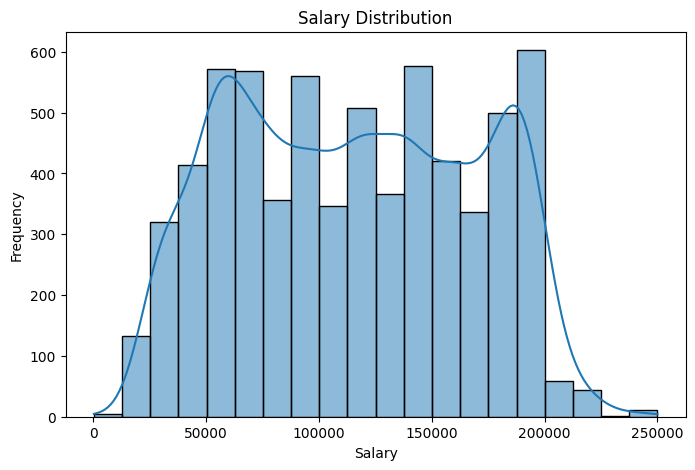

In [11]:
# Histogram of Salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], kde=True, bins=20)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

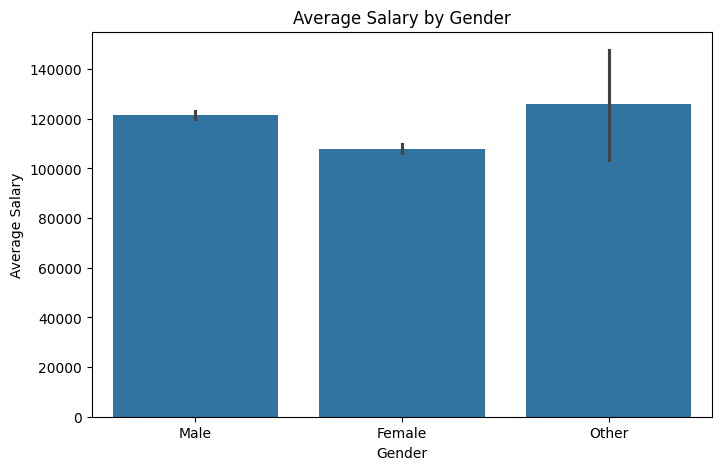

In [12]:
# Bar chart of Salry by Gender
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=df, estimator=np.mean)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

In [13]:
print(df['Education Level'].unique())

# Define a mapping dictionary
education_mapping = {
    "Bachelor's": "Bachelor's Degree",
    "Master's": "Master's Degree",
    "PhD": "PhD",
    "High School": "High School",
    "phD": "PhD"
}

# Apply the mapping
df['Education Level'] = df['Education Level'].replace(education_mapping)

print(df['Education Level'].unique())

["Bachelor's" "Master's" 'PhD' "Bachelor's Degree" "Master's Degree"
 'High School' 'phD']
["Bachelor's Degree" "Master's Degree" 'PhD' 'High School']


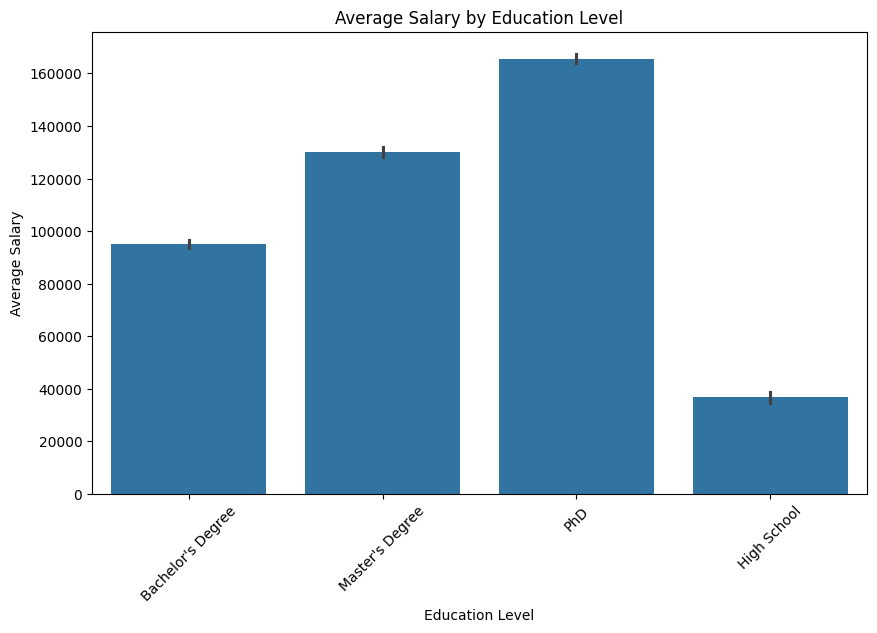

In [14]:
# Bar chart of Salary by Education Level
plt.figure(figsize=(10, 6))
sns.barplot(x='Education Level', y='Salary', data=df, estimator=np.mean)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

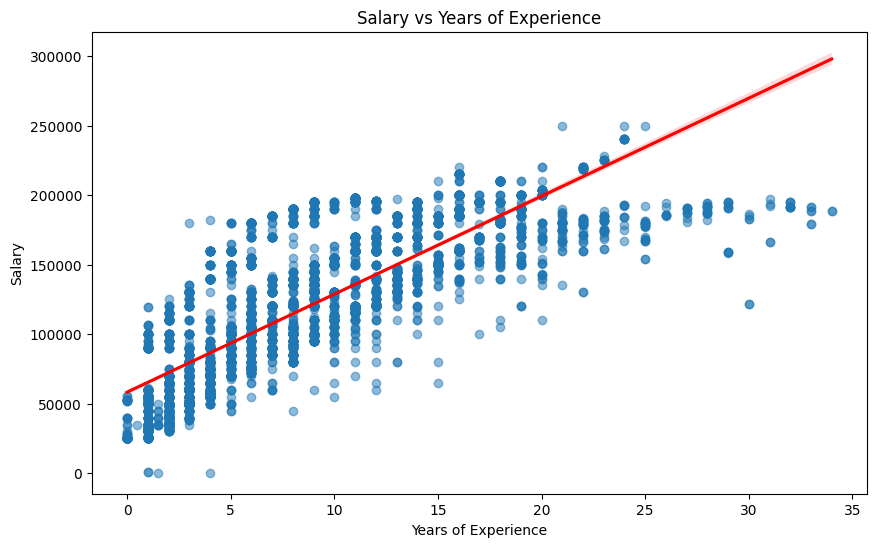

In [15]:
# scatter plot with trend line of saalary by years of experience
plt.figure(figsize=(10, 6))
sns.regplot(x='Years of Experience', y='Salary', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

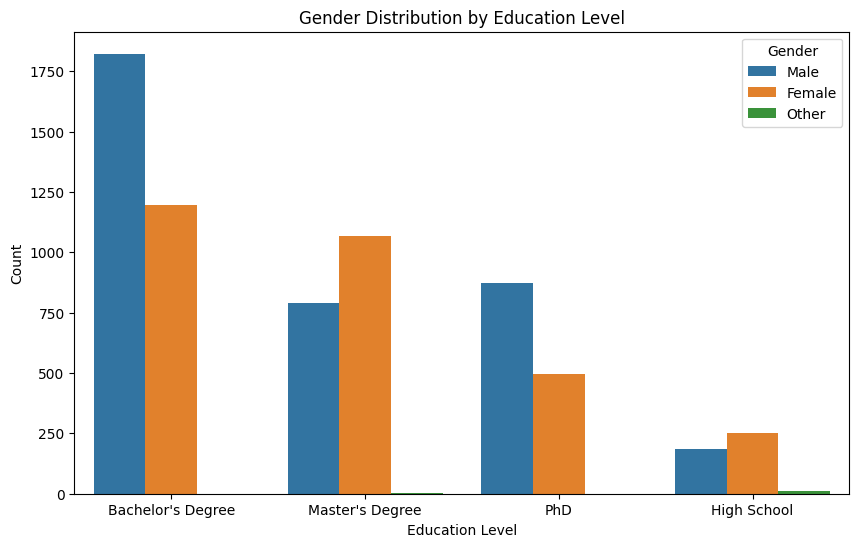

In [16]:
# Education level by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Education Level', hue='Gender', data=df)
plt.title('Gender Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

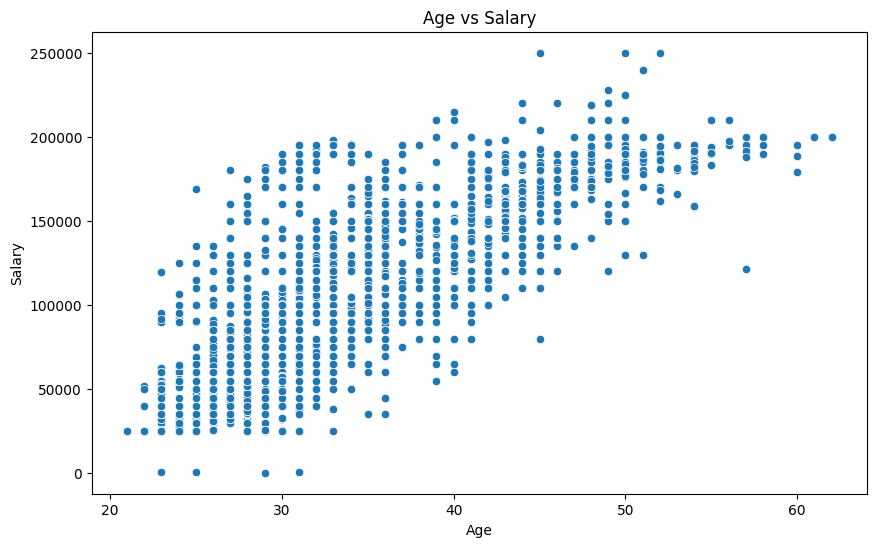

In [17]:
# Scatter plot of age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

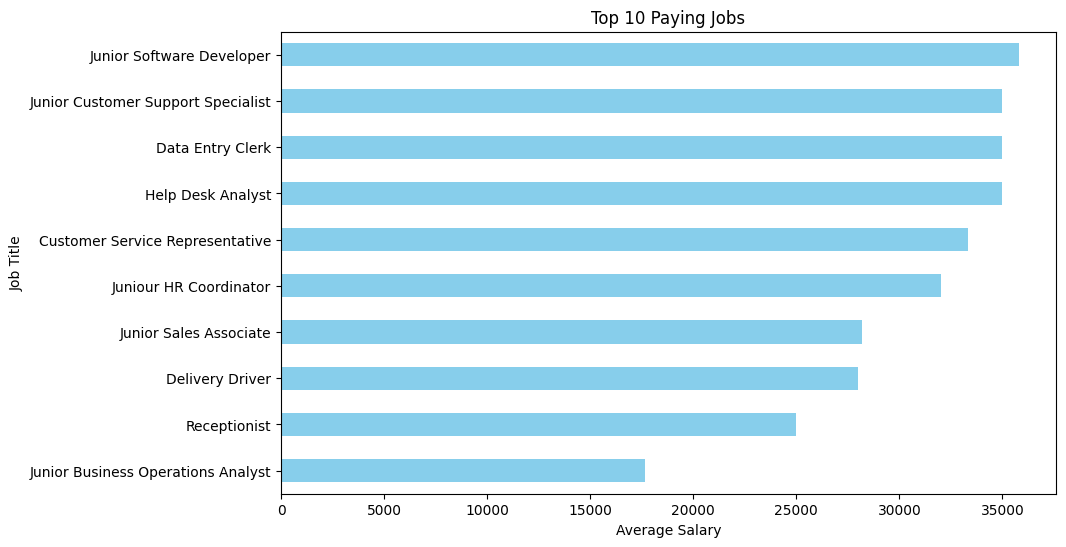

In [18]:
# Horizontal bar chart of top paying jobs
top_paying_jobs = df.groupby('Job Title')['Salary'].mean().sort_values(ascending=True).head(10)
plt.figure(figsize=(10, 6))
top_paying_jobs.plot(kind='barh', color='skyblue')
plt.title('Top 10 Paying Jobs')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.show()